## Capstone Project


### Final Task

##### BDA - 1903 

#### Yenglik Kadyr, Rustam Ospanov, Aman Nuftolla

## The purpose of the task:

+ The main task is to build a model that will predict value for the variable - Target (numerical), i.e. it is a regression problem. Use 'train.csv' file for training your model/models. Predict the Target variable for the test dataset in 'test.csv' file. Note that you don't have access to Target variable in the test dataset. Evaluation of models should be done based on the following metric: MSE - mean squared error.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# identify target
target = train['Target']

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1000 non-null   int64  
 1   N1      1000 non-null   float64
 2   N2      1000 non-null   int64  
 3   N3      1000 non-null   float64
 4   N4      1000 non-null   float64
 5   N5      1000 non-null   float64
 6   N6      1000 non-null   float64
 7   C1      1000 non-null   int64  
 8   C2      1000 non-null   object 
 9   C3      1000 non-null   object 
 10  C4      1000 non-null   object 
 11  C5      1000 non-null   object 
 12  C6      1000 non-null   object 
 13  C7      1000 non-null   object 
 14  C8      1000 non-null   object 
 15  C9      1000 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 125.1+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Target  5000 non-null   int64  
 2   N1      5000 non-null   float64
 3   N2      5000 non-null   int64  
 4   N3      5000 non-null   float64
 5   N4      4995 non-null   float64
 6   N5      4995 non-null   float64
 7   N6      4994 non-null   float64
 8   C1      5000 non-null   int64  
 9   C2      5000 non-null   object 
 10  C3      5000 non-null   object 
 11  C4      5000 non-null   object 
 12  C5      5000 non-null   object 
 13  C6      5000 non-null   object 
 14  C7      4999 non-null   object 
 15  C8      4999 non-null   object 
 16  C9      4999 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 664.2+ KB


In [5]:
train.describe()

,Id,Target,N1,N2,N3,N4,N5,N6,C1
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4995.000000,4995.000000,4994.000000,5000.000000
mean,12499.500000,3.268910e+06,3.686798e+06,8.207600,2.298200,4.427027,4.526126,4.434722,1.643200
std,1443.520003,2.002069e+06,2.115422e+06,4.420816,0.717473,2.892762,2.907785,2.907934,0.729383
min,10000.000000,7.000000e+05,6.871795e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,11249.750000,2.142750e+06,2.482731e+06,4.000000,1.600000,2.000000,2.000000,2.000000,1.000000
50%,12499.500000,2.731500e+06,3.157179e+06,9.000000,2.300000,4.000000,5.000000,4.000000,1.000000
75%,13749.250000,3.830250e+06,4.304605e+06,11.000000,2.700000,7.000000,7.000000,7.000000,2.000000
max,14999.000000,2.305900e+07,2.266484e+07,19.000000,5.700000,9.000000,9.000000,9.000000,3.000000


In [6]:
# Describe for categorical values
train.describe(include=[object])

,C2,C3,C4,C5,C6,C7,C8,C9
count,5000,5000,5000,5000,5000,4999,4999,4999
unique,2,3,3,5,7,22,29,32
top,A,F,V,B,S,J,T,1
freq,4198,3395,2995,4211,2884,1516,1467,1064


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file("DataVisualization.html")

ModuleNotFoundError: No module named 'pandas_profiling'

### Data Preprocessing

In [8]:
train = train.drop(train.index[0])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

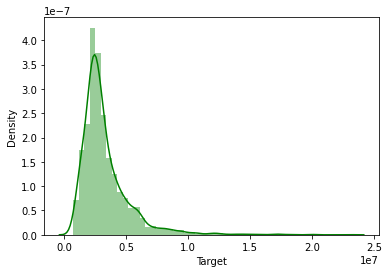

In [9]:
sns.distplot(train['Target'], color='g')

In [10]:
train = train.set_index('Id')
test = test.set_index('Id')

In [11]:
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print ()
print (train[categorical_feats_train].columns)

Quantity of Numerical features:  8

Index(['Target', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'C1'], dtype='object')

Quantity of Categorical features:  8

Index(['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], dtype='object')


In [12]:
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values.")

Target    0
N1        0
N2        0
N3        0
N4        5
N5        5
N6        6
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        1
C8        1
C9        1
dtype: int64

There are 6 columns with NAN values.


In [13]:
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN value.")
nan_columns

N1    0
N2    0
N3    0
N4    0
N5    0
N6    0
C1    0
C2    0
C3    0
C4    0
C5    0
C6    0
C7    0
C8    0
C9    0
dtype: int64

There are 0 columns with NAN value.


[]

In [14]:
train = train.dropna()
train

,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
Id,,,,,,,,,,,,,,,,
10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
10005,2000000,2597435.897,12,2.4,2.0,2.0,6.0,1,A,F,V,B,C,K,M,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,W,D,F
14996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,4,T,1
14997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,J,T,E


In [15]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [16]:
y=train['Target']
train = train.drop(columns=['Target'])

In [17]:
train = train.apply(lambda x: object_to_int(x))
train.head()

,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
Id,,,,,,,,,,,,,,,
10001,3572619.048,8,2.5,8.0,6.0,9.0,2,0,2,2,0,4,8,17,1
10002,9813953.488,6,3.5,2.0,9.0,0.0,1,0,1,1,0,4,18,9,11
10003,4529545.455,5,2.5,4.0,6.0,4.0,1,0,2,1,1,4,3,22,1
10004,3823255.814,10,3.5,1.0,5.0,4.0,1,0,2,1,1,4,3,22,1
10005,2597435.897,12,2.4,2.0,2.0,6.0,1,0,2,2,0,0,9,16,7


In [18]:
test = test.apply(lambda x: object_to_int(x))
test.head()

,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
Id,,,,,,,,,,,,,,,
20000,2828048.780,8,1.8,6.0,1.0,9.0,1,0,2,2,0,4,16,21,27
20001,2866279.070,3,1.6,1.0,2.0,7.0,2,0,2,2,0,1,18,6,4
20002,4620238.095,4,2.0,6.0,6.0,2.0,2,0,0,1,0,0,7,14,9
20003,3400000.000,9,2.5,9.0,1.0,9.0,1,0,0,2,0,5,7,10,1
20004,3751851.852,9,3.5,8.0,3.0,7.0,1,0,2,1,0,4,7,19,20


In [21]:
test.shape

(1000, 15)

In [22]:
train.shape

(4993, 15)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train)
sc_test = sc.transform(test)

In [24]:
sc_train = pd.DataFrame(sc_train)
sc_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.055035,-0.045900,0.280760,1.234921,0.507364,1.570092,0.488662,-0.4368,0.668067,0.778855,-0.376217,0.496244,-0.563402,0.054660,-1.140129
1,2.895038,-0.498374,1.674371,-0.839647,1.539245,-1.524978,-0.882062,-0.4368,-0.464585,-1.018198,-0.376217,0.496244,1.152928,-1.183068,-0.004209
2,0.397272,-0.724611,0.280760,-0.148124,0.507364,-0.149392,-0.882062,-0.4368,0.668067,-1.018198,1.445752,0.496244,-1.421567,0.828240,-1.140129
3,0.063432,0.406574,1.674371,-1.185408,0.163404,-0.149392,-0.882062,-0.4368,0.668067,-1.018198,1.445752,0.496244,-1.421567,0.828240,-1.140129
4,-0.515972,0.859049,0.141399,-0.839647,-0.868477,0.538402,-0.882062,-0.4368,0.668067,0.778855,-0.376217,-1.651780,-0.391769,-0.100056,-0.458577


In [25]:
sc_test = pd.DataFrame(sc_test)
sc_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.406969,-0.045900,-0.694768,0.543398,-1.212438,1.570092,-0.882062,-0.4368,0.668067,0.778855,-0.376217,0.496244,0.809662,0.673524,1.813263
1,-0.388899,-1.177085,-0.973490,-1.185408,-0.868477,0.882299,0.488662,-0.4368,0.668067,0.778855,-0.376217,-1.114774,1.152928,-1.647216,-0.799353
2,0.440140,-0.950848,-0.416046,0.543398,0.507364,-0.837185,0.488662,-0.4368,-1.597236,-1.018198,-0.376217,-1.651780,-0.735035,-0.409488,-0.231393
3,-0.136627,0.180337,0.280760,1.580682,-1.212438,1.570092,-0.882062,-0.4368,-1.597236,0.778855,-0.376217,1.033250,-0.735035,-1.028352,-1.140129
4,0.029682,0.180337,1.674371,1.234921,-0.524517,0.882299,-0.882062,-0.4368,0.668067,-1.018198,-0.376217,0.496244,-0.735035,0.364092,1.018119


In [26]:
# set 'X' for features of scaled Train dataset 'sc_train'
X = sc_train

# set 'y' for the target 'Profit'

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = sc_test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([2455080.45634318, 5071132.29305809, 2227367.78930361, ...,
       2741234.5096975 , 2890302.910049  , 3158675.44770286])

In [29]:
LRscore = LR.score(X_test, y_test)

In [30]:
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.979951,198117.092281,8.151105e+10,285501.405464,0.008012,0.089509


In [33]:
LR_pred = LR.predict(sc_test)
LR_pred = np.around(GB_pred, decimals = -3)
sub = pd.DataFrame()
sub['Id'] = test.index
sub['Target'] = LR_pred
sub.to_csv('Predictions1.csv', index=False)

ValueError: Length of values (1498) does not match length of index (1000)

In [34]:
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore =GB.score(X_test, y_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
regr_pred = regr.predict(X_test)
regrscore =regr.score(X_test, y_test)

In [36]:
regr_pred=regr.predict(sc_test)
LR_pred = np.around(GB_pred, decimals = -3)
sub = pd.DataFrame()
sub['Id'] = test.index
sub['Target'] = regr_pred
sub.to_csv('PredictionsRFRRaund.csv', index=False)

In [37]:
GBMetrics = pd.DataFrame({'Model': 'RandomForestRegressor',
                          'r2score':r2_score(y_test,regr_pred),
                          'MAE': metrics.mean_absolute_error (y_test,regr_pred),
                          'MSE': metrics.mean_squared_error(y_test,regr_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,regr_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,regr_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,regr_pred))             
                          },index=[2])

GBMetrics

ValueError: Found input variables with inconsistent numbers of samples: [1498, 1000]

In [38]:
sub = pd.DataFrame()
sub['Id'] = test.index
sub['Target'] = regr_pred
sub.to_csv('Predictions.csv', index=False)

In [39]:
# GB_pred = np.around(GB_pred, decimals = -3)

In [40]:
GB_pred

array([2403156.83128341, 4902322.54164566, 2289870.03804249, ...,
       2734824.84873787, 2871987.78380125, 3150887.90665361])

In [41]:
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.978488,192037.659857,8.745766e+10,295732.418978,0.007448,0.086304


In [42]:
GB_pred = np.around(GB_pred, decimals = -3)

In [43]:
sub = pd.DataFrame()
sub['Id'] = test.index
sub['Target'] = GB_pred
sub.to_csv('Predictions.csv', index=False)

ValueError: Length of values (1498) does not match length of index (1000)

In [44]:
from sklearn.linear_model import LassoCV 
#some values of alpha 
alphas = 10**np.linspace(10, -2, 100) * 0.5 
 
#let's choose the most oprimal alpha  
lassocv = LassoCV(alphas = alphas, normalize=False, cv=5)  
lassocv.fit(X_train, y_train) 
optimal = lassocv.alpha_ 
optimal

4348.745013088917

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000, normalize=False)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [46]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

81377857188.72919

## Conclusion